<a href="https://colab.research.google.com/github/UmmuGulsumSima/UmmuGulsumSima/blob/main/CIFAR10Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Gerekli kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical  # np_utils yerine to_categorical kullanıyoruz
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 254ms/step - accuracy: 0.2649 - loss: 2.1226 - val_accuracy: 0.4572 - val_loss: 1.5412
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 76s 237ms/step - accuracy: 0.4647 - loss: 1.4916 - val_accuracy: 0.5262 - val_loss: 1.3476
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 238ms/step - accuracy: 0.5224 - loss: 1.3491 - val_accuracy: 0.5238 - val_loss: 1.3493
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 239ms/step - accuracy: 0.5635 - loss: 1.2360 - val_accuracy: 0.5643 - val_loss: 1.2329
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 239ms/step - accuracy: 0.5900 - loss: 1.1565 - val_accuracy: 0.6086 - val_loss: 1.1431
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 244ms/step - accuracy: 0.6195 - loss: 1.0867 - val_accuracy: 0.6050 - val_loss: 1.1103
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 246ms/step - accuracy: 0.6370 - loss: 1.0335 - val_accuracy: 0.6163 - val_loss: 1.1001
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 240ms/step - accuracy: 0.6592 - loss: 0

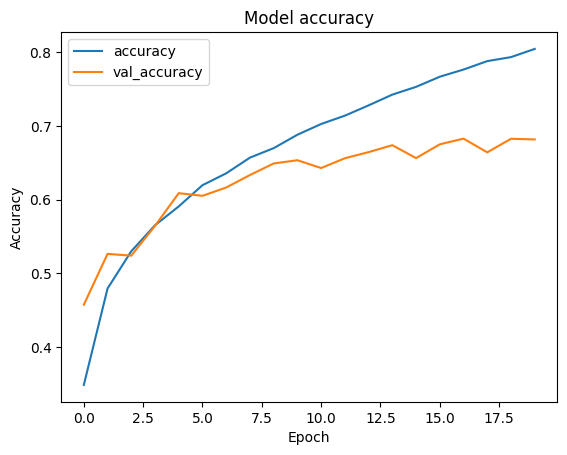

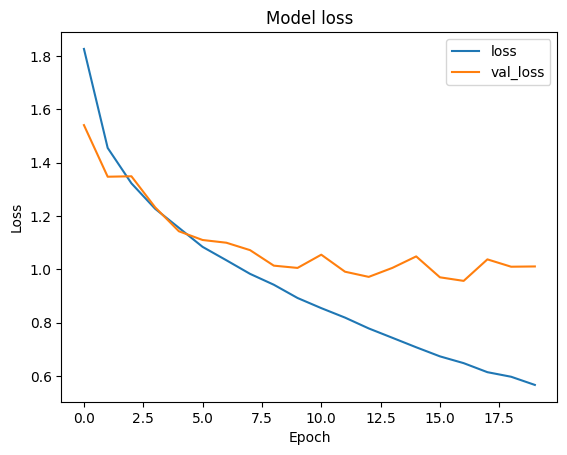

In [ ]:
# CIFAR-10 veri setini yükle
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# One-hot encoding
num_classes = 10
Y_train = to_categorical(y_train, num_classes)  # np_utils yerine to_categorical kullanıyoruz
Y_test = to_categorical(y_test, num_classes)

# Verileri normalleştir
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Modeli oluştur
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Modeli derle
optim = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

# Modeli eğit
num_epochs = 20
batch_size = 128
validation_split = 0.2

history = model.fit(X_train, Y_train, batch_size=batch_size,
                    epochs=num_epochs, validation_split=validation_split,
                    verbose=1)

# Modeli değerlendir
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# Eğitim sürecindeki kayıp ve doğruluk değerlerini görselleştir
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


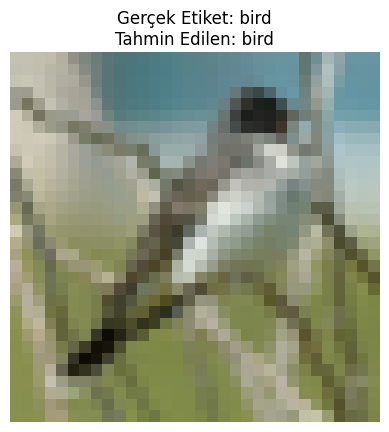

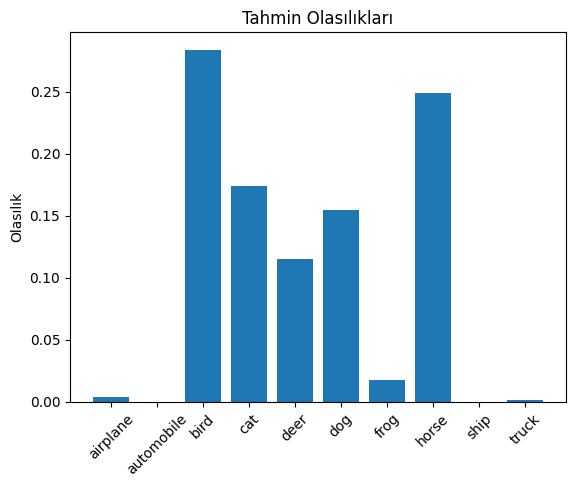

In [ ]:
# CIFAR-10 etiket isimleri
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Test veri setinden bir rastgele örnek seçelim
import numpy as np
import matplotlib.pyplot as plt

# Test setinden rastgele bir resim seçelim
random_index = np.random.randint(0, X_test.shape[0])
test_image = X_test[random_index]
test_label = np.argmax(Y_test[random_index])

# Modeli kullanarak tahmin yapalım
predicted_probs = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probs)

# Görseli ve tahmin sonuçlarını gösterelim
plt.imshow(test_image)
plt.title(f"Gerçek Etiket: {class_names[test_label]}\nTahmin Edilen: {class_names[predicted_label]}")
plt.axis('off')
plt.show()

# Ayrıca tahmin olasılıklarını da görselleştirebiliriz
plt.bar(class_names, predicted_probs[0])
plt.title("Tahmin Olasılıkları")
plt.ylabel("Olasılık")
plt.xticks(rotation=45)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


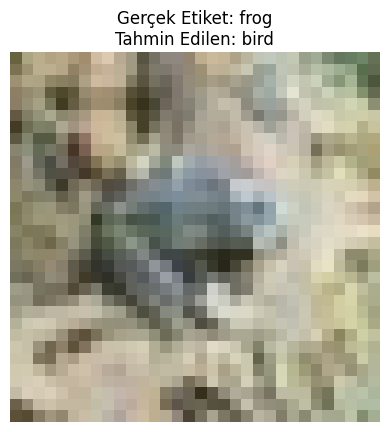

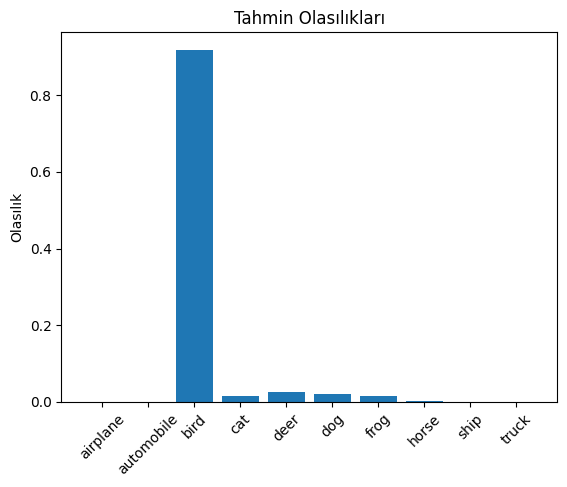

In [ ]:
# CIFAR-10 etiket isimleri
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Test veri setinden bir rastgele örnek seçelim
import numpy as np
import matplotlib.pyplot as plt

# Test setinden rastgele bir resim seçelim
random_index = np.random.randint(0, X_test.shape[0])
test_image = X_test[random_index]
test_label = np.argmax(Y_test[random_index])

# Modeli kullanarak tahmin yapalım
predicted_probs = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probs)

# Görseli ve tahmin sonuçlarını gösterelim
plt.imshow(test_image)
plt.title(f"Gerçek Etiket: {class_names[test_label]}\nTahmin Edilen: {class_names[predicted_label]}")
plt.axis('off')
plt.show()

# Ayrıca tahmin olasılıklarını da görselleştirebiliriz
plt.bar(class_names, predicted_probs[0])
plt.title("Tahmin Olasılıkları")
plt.ylabel("Olasılık")
plt.xticks(rotation=45)
plt.show()
